In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np
from glob import glob

In [ ]:
import lib.marking_evaluation as meval
import lib.draw as draw

In [ ]:
def plot_team(team, save_fig_dir='', dpi=1200, adversary=meval.default_adversary_1):
    team = [float(i) for i in team.replace('[','').replace(']','').replace(' ','').split(',')]
    aux = []
    for i in range(10):
        aux.append([team[2*i], team[2*i+1]])
    team = meval.create_team(aux)

    adversary.plot_result(team, save_fig_dir=save_fig_dir)

In [ ]:
meval.default_adversary_1.plot_team(dpi=1200)
plt.savefig('img/pitch_viz/100_default_adversary.pdf', format='pdf', bbox_inches='tight');

In [ ]:
draw.pitch(dpi = 1200)
attacking_team = [(player.x, player.y, 0) for player in meval.default_442_formation.players]
for i, player in enumerate(attacking_team):
    plt.scatter(player[0], player[1], s=75, color='orange', edgecolors='C1', linewidths=1,  zorder=10)
    plt.text(player[0], player[1], i, zorder=11, fontsize='xx-small', color='white', ha='center', va='center')
plt.savefig('img/pitch_viz/101_442_formation.pdf', format='pdf', bbox_inches='tight');

# Isolated criteria

In [ ]:
da = meval.default_adversary_1

In [ ]:
res_criteria_1 = pd.read_csv('results/005_criteria_1000_Jun_12_08_32_14.csv')

team = res_criteria_1[res_criteria_1.fitness == res_criteria_1.fitness.max()].proposal.iloc[0]

attacking_team = [[player.x, player.y] for player in da.players]
team = [float(i) for i in team.replace('[','').replace(']','').replace(' ','').split(',')]

defensive_team = []
for i in range(10):
    defensive_team.append([team[2*i], team[2*i+1]])

draw.pitch(dpi = 1200)
# Draw initial state
for i, player in enumerate(attacking_team):
    plt.scatter(player[0], player[1], s=75, color='blue', edgecolors='navy', linewidths=1,  zorder=10)
    plt.text(player[0], player[1], i, zorder=11, fontsize='xx-small', color='white', ha='center', va='center')

for i, player in enumerate(defensive_team):
    plt.scatter(player[0], player[1], s=75, color='orange', edgecolors='C1', linewidths=1,  zorder=10)
    plt.text(player[0], player[1], i, zorder=11, fontsize='xx-small', color='white', ha='center', va='center')

for player in attacking_team[1:]:
    pl = meval.PassLine(meval.Player(attacking_team[0][0], attacking_team[0][1]), meval.Player(player[0], player[1]))
    plt.plot([attacking_team[0][0], player[0]], [attacking_team[0][1], player[1]], color = 'tab:green')
    for def_player in defensive_team:
        if pl.is_line_blocked(meval.Player(def_player[0], def_player[1])):
            plt.plot([attacking_team[0][0], player[0]], [attacking_team[0][1], player[1]], color = 'tab:red')
            del defensive_team[defensive_team.index(def_player)]
            break

plt.savefig('img/pitch_viz/ic_1000.pdf', format='pdf', bbox_inches='tight');

In [ ]:
res_criteria_1 = pd.read_csv('results/005_criteria_0100_Jun_12_08_33_39.csv')

team = res_criteria_1[res_criteria_1.fitness == res_criteria_1.fitness.max()].proposal.iloc[0]

attacking_team = [[player.x, player.y] for player in da.players]
team = [float(i) for i in team.replace('[','').replace(']','').replace(' ','').split(',')]

defensive_team = []
for i in range(10):
    defensive_team.append([team[2*i], team[2*i+1]])

draw.pitch(dpi = 1200)
# Draw initial state
for i, player in enumerate(attacking_team):
    plt.scatter(player[0], player[1], s=75, color='blue', edgecolors='navy', linewidths=1,  zorder=10)
    plt.text(player[0], player[1], i, zorder=11, fontsize='xx-small', color='white', ha='center', va='center')

for i, player in enumerate(defensive_team):
    plt.scatter(player[0], player[1], s=75, color='orange', edgecolors='C1', linewidths=1,  zorder=10)
    plt.text(player[0], player[1], i, zorder=11, fontsize='xx-small', color='white', ha='center', va='center')

for player in attacking_team:
    pl = meval.PassLine(meval.Player(100, 50), meval.Player(player[0], player[1]))
    plt.plot([100, player[0]], [50, player[1]], color = 'tab:green')
    for def_player in defensive_team:
        if pl.is_line_blocked(meval.Player(def_player[0], def_player[1])):
            plt.plot([100, player[0]], [50, player[1]], color = 'tab:red')
            del defensive_team[defensive_team.index(def_player)]
            break

plt.savefig('img/pitch_viz/ic_0100.pdf', format='pdf', bbox_inches='tight');

In [ ]:
res_criteria_1 = pd.read_csv('results/005_criteria_0010_Jun_12_08_41_09.csv')

team = res_criteria_1[res_criteria_1.fitness == res_criteria_1.fitness.max()].proposal.iloc[0]

attacking_team = [meval.Player(player.x, player.y) for player in da.players]
team = [float(i) for i in team.replace('[','').replace(']','').replace(' ','').split(',')]

defensive_team = []
for i in range(10):
    defensive_team.append(meval.Player(team[2*i], team[2*i+1]))

draw.pitch(dpi = 1200)
# Draw initial state
for i, player in enumerate(attacking_team):
    plt.scatter(player.x, player.y, s=75, color='blue', edgecolors='navy', linewidths=1,  zorder=10)
    plt.text(player.x, player.y, i, zorder=11, fontsize='xx-small', color='white', ha='center', va='center')

for i, player in enumerate(defensive_team):
    plt.scatter(player.x, player.y, s=75, color='orange', edgecolors='C1', linewidths=1,  zorder=10)
    plt.text(player.x, player.y, i, zorder=11, fontsize='xx-small', color='white', ha='center', va='center')

for player in attacking_team:
    distances = []
    for proposed_team_player in defensive_team:
        distances.append(meval.distance(player, proposed_team_player))
    min_distances = min(distances)

    covering_player = defensive_team[distances.index(min_distances)]
    plt.plot([covering_player.x, player.x], [covering_player.y, player.y], color = 'tab:green')
    plt.scatter([covering_player.x, player.x], [covering_player.y, player.y], s=150, color = 'tab:green')



    # If distance is too close, remove
    if min_distances < 1:
        total_marking_distance += 2

plt.savefig('img/pitch_viz/ic_0010.pdf', format='pdf', bbox_inches='tight');

In [ ]:
res_criteria_1 = pd.read_csv('results/005_criteria_0001_Jun_12_08_53_40.csv')
plot_team(res_criteria_1[res_criteria_1.fitness == res_criteria_1.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/ic_0001.pdf');

# Random Search

In [ ]:
randsearch = [pd.read_csv(f) for f in glob('results/010_randsearch*.csv')]
for res in randsearch: res.fitness = res.fitness.clip(0)
worse_randsearch = randsearch[[df.fitness.max() for df in randsearch].index(min([df.fitness.max() for df in randsearch]))]
best_randsearch = randsearch[[df.fitness.max() for df in randsearch].index(max([df.fitness.max() for df in randsearch]))]
avg_randsearch = randsearch[0].fitness.rolling(60000, min_periods=1).max()
for res in randsearch[1:]: avg_randsearch += res.fitness.rolling(60000, min_periods=1).max()
avg_randsearch /= len(randsearch)

In [ ]:
plot_team(best_randsearch[best_randsearch.fitness == best_randsearch.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/101_best_random.pdf')

# Optuna CMA-ES

In [ ]:
cmaes = [pd.read_csv(f) for f in glob('results/011a_cmaes*.csv')]
for res in cmaes: res.fitness = res.fitness.clip(0)
worse_cmaes = cmaes[[df.fitness.max() for df in cmaes].index(min([df.fitness.max() for df in cmaes]))]
best_cmaes = cmaes[[df.fitness.max() for df in cmaes].index(max([df.fitness.max() for df in cmaes]))]
avg_cmaes = cmaes[0].fitness.rolling(60000, min_periods=1).max()
for res in cmaes[1:]: avg_cmaes += res.fitness.rolling(60000, min_periods=1).max()
avg_cmaes /= len(cmaes)

In [ ]:
plot_team(best_cmaes[best_cmaes.fitness == best_cmaes.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/102_best_cmaes.pdf');

# Optuna TPE

In [ ]:
tpe = [pd.read_csv(f) for f in glob('results/011b_tpe*.csv')]
for res in tpe: res.fitness = res.fitness.clip(0)
worse_tpe = tpe[[df.fitness.max() for df in tpe].index(min([df.fitness.max() for df in tpe]))]
best_tpe = tpe[[df.fitness.max() for df in tpe].index(max([df.fitness.max() for df in tpe]))]
avg_tpe = tpe[0].fitness.rolling(60000, min_periods=1).max()
for res in tpe[1:]: avg_tpe += res.fitness.rolling(60000, min_periods=1).max()
avg_tpe /= len(tpe)

In [ ]:
plot_team(best_tpe[best_tpe.fitness == best_tpe.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/103_best_tpe.pdf');

# Hill climb   

In [ ]:
hillclimb = [pd.read_csv(f) for f in glob('results/012_hillclimb*.csv')]
for res in hillclimb: res.fitness = res.fitness.clip(0)
worse_hillclimb = hillclimb[[df.fitness.max() for df in hillclimb].index(min([df.fitness.max() for df in hillclimb]))]
best_hillclimb = hillclimb[[df.fitness.max() for df in hillclimb].index(max([df.fitness.max() for df in hillclimb]))]
avg_hillclimb = hillclimb[0].fitness.rolling(60000, min_periods=1).max()
for res in hillclimb[1:]: avg_hillclimb += res.fitness.rolling(60000, min_periods=1).max()
avg_hillclimb /= len(hillclimb)

In [ ]:
plot_team(best_hillclimb[best_hillclimb.fitness == best_hillclimb.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/105_best_hclimb.pdf');

# Simulated Annealing

In [ ]:
simanneal = [pd.read_csv(f) for f in glob('results/013_simanneal*.csv')]
for res in simanneal: res.fitness = res.fitness.clip(0)
worse_simanneal = simanneal[[df.fitness.max() for df in simanneal].index(min([df.fitness.max() for df in simanneal]))]
best_simanneal = simanneal[[df.fitness.max() for df in simanneal].index(max([df.fitness.max() for df in simanneal]))]
avg_simanneal = simanneal[0].fitness.rolling(60000, min_periods=1).max()
for res in simanneal[1:]: avg_simanneal += res.fitness.rolling(60000, min_periods=1).max()
avg_simanneal /= len(simanneal)

In [ ]:
plot_team(best_simanneal[best_simanneal.fitness == best_simanneal.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/106_best_sanneal.pdf');

# Genetic Algorithms

In [ ]:
genetic = [pd.read_csv(f) for f in glob('results/014_genetic*.csv')]
for res in genetic: res.fitness = res.fitness.clip(0)
worse_genetic = genetic[[df.fitness.max() for df in genetic].index(min([df.fitness.max() for df in genetic]))]
best_genetic = genetic[[df.fitness.max() for df in genetic].index(max([df.fitness.max() for df in genetic]))]
avg_genetic = genetic[0].fitness.rolling(60000, min_periods=1).max()
for res in genetic[1:]: avg_genetic += res.fitness.rolling(60000, min_periods=1).max()
avg_genetic /= len(genetic)

In [ ]:
plot_team(best_genetic[best_genetic.fitness == best_genetic.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/107_best_galg.pdf');

# Generalization

In [ ]:
new_adversary_1 = pd.read_csv('results/015_generalize_2_Jun_12_08_43_26.csv')
plot_team(new_adversary_1[new_adversary_1.fitness == new_adversary_1.fitness.max()].proposal.iloc[0], adversary=meval.default_adversary_2, save_fig_dir='img/pitch_viz/111_da2.pdf');

In [ ]:
new_adversary_2 = pd.read_csv('results/015_generalize_3_Jun_12_08_58_10.csv')
plot_team(new_adversary_2[new_adversary_2.fitness == new_adversary_2.fitness.max()].proposal.iloc[0], adversary=meval.default_adversary_3, save_fig_dir='img/pitch_viz/111_da3.pdf');

In [ ]:
new_adversary_3 = pd.read_csv('results/015_generalize_4_Jun_12_09_12_19.csv')
plot_team(new_adversary_3[new_adversary_3.fitness == new_adversary_3.fitness.max()].proposal.iloc[0], adversary=meval.default_adversary_4, save_fig_dir='img/pitch_viz/111_da4.pdf');

In [ ]:
new_adversary_4 = pd.read_csv('results/015_generalize_5_Jun_12_09_22_31.csv')
plot_team(new_adversary_4[new_adversary_4.fitness == new_adversary_4.fitness.max()].proposal.iloc[0], adversary=meval.default_adversary_5, save_fig_dir='img/pitch_viz/111_da5.pdf');

# Evolution plots

In [ ]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 1200
plt.rcParams['figure.figsize'] = (9,4)
plt.rcParams['font.size'] = 16

In [ ]:
def type1_figure(df_best, baseline=True, baseline_len=10000):
    plt.plot(df_best.fitness, marker='.', linestyle='', color='C1', label='Iteration', markersize=0.7)
    plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='C0', alpha=0.8, lw=3)
    plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='red', alpha=0.8, lw=3, label='Solution')
    if baseline: plt.plot(res_random_search_da1.fitness.iloc[:baseline_len].rolling(60000, min_periods=1).max(), color='C3', label='Random Search', zorder=-1)
    plt.grid(alpha=0.12, linestyle='--')
    plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
    plt.ylabel('Fitness')
    plt.xlabel('Iteration')

In [ ]:
def type2_figure(res, baseline_len=4000):
    for df in res:
        df = df.drop_duplicates()
        plt.plot(df.fitness.rolling(60000, min_periods=1).max(), color='C0', alpha=0.7, lw=2.5, label='Solution')

    best = [df.fitness.max() for df in res].index(max([df.fitness.max() for df in res]))
    worst = [df.fitness.max() for df in res].index(min([df.fitness.max() for df in res]))

    plt.plot(res[best].fitness.rolling(60000, min_periods=1).max(), color='red', alpha=0.7, lw=3, label='Best performance')
    plt.plot(res[worst].fitness.rolling(60000, min_periods=1).max(), color='chocolate', alpha=0.7, lw=3, label='Worst performance')
    plt.plot(res_random_search_da1.fitness.iloc[:baseline_len].rolling(60000, min_periods=1).max(), color='C3', label='Random Search')
    plt.ylabel('Fitness')
    plt.xlabel('Iteration')
    plt.grid(alpha=0.12, linestyle='--')
    plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])

## Random Search

In [ ]:
randsearch_time_per_it = np.median([df.cycle_time.sum()/len(df) for df in randsearch])
cmaes_time_per_it = np.median([df.cycle_time.sum()/len(df) for df in cmaes])
tpe_time_per_it = np.median([df.cycle_time.sum()/len(df) for df in tpe])
hillclimb_time_per_it = np.median([df.groupby('iteration').max().cycle_time.sum()/len(df) for df in hillclimb])
simanneal_time_per_it = np.median([df.groupby('iteration').max().cycle_time.sum()/len(df) for df in simanneal])
genetic_time_per_it = np.median([df.groupby('iteration').max().cycle_time.sum()/len(df) for df in genetic])
cmaes_time_per_it, tpe_time_per_it, hillclimb_time_per_it, simanneal_time_per_it, genetic_time_per_it

In [ ]:
cmaes_time = int(np.median([df.cycle_time.sum() for df in cmaes]) / randsearch_time_per_it)
tpe_time = int(np.median([df.cycle_time.sum() for df in tpe]) / randsearch_time_per_it)
hillclimb_time = int(np.median([df.groupby('iteration').max().cycle_time.sum() for df in hillclimb]) / randsearch_time_per_it)
simanneal_time = int(np.median([df.groupby('iteration').max().cycle_time.sum() for df in simanneal]) / randsearch_time_per_it)
genetic_time = int(np.median([df.groupby('iteration').max().cycle_time.sum() for df in genetic]) / randsearch_time_per_it)
cmaes_time, tpe_time, hillclimb_time, simanneal_time, genetic_time

In [ ]:
avg_randsearch.iloc[cmaes_time], avg_randsearch.iloc[tpe_time], avg_randsearch.iloc[hillclimb_time], avg_randsearch.iloc[simanneal_time],  avg_randsearch.iloc[genetic_time]

In [ ]:
boxwidth = 500

longest_time = max([run.cycle_time.cumsum().iloc[-1] for run in randsearch])
tries_results = []
for run in randsearch:
    plt.plot(run.cycle_time.cumsum(), run.fitness.rolling(60000, min_periods=1).max(), color='tab:orange', alpha=0.3, zorder=2, label='Individual Runs')
    tries_results.append(run.fitness.max())
vplot = plt.violinplot([tries_results], positions=[longest_time], widths=boxwidth)
for pc in vplot['bodies']:
    pc.set_linewidth(1)
    pc.set_facecolor('tab:orange')
    pc.set_edgecolor('tab:orange')
    pc.set_alpha(0.5)

plt.plot(best_randsearch.cycle_time.cumsum(), best_randsearch.fitness.rolling(60000, min_periods=1).max(), color='#a50258', linewidth=2.5, linestyle='--', label='Best', zorder=3)
plt.plot(avg_randsearch.index * randsearch_time_per_it, avg_randsearch, color='#0272a2', linewidth=2.5, linestyle='-.', label='Average', zorder=3)
plt.plot(worse_randsearch.cycle_time.cumsum(), worse_randsearch.fitness.rolling(60000, min_periods=1).max(), color='#8c510a', linewidth=2.5, linestyle=':', label='Worse', zorder=3)

boxes, positions = [], []
for i in range(100):
    boxes.append(best_randsearch[(best_randsearch.cycle_time.cumsum() > i*boxwidth) & (best_randsearch.cycle_time.cumsum() < (i+1)*boxwidth)].fitness)
    positions.append(boxwidth/2 + i*boxwidth)
    if (i + 2) * boxwidth > best_randsearch.cycle_time.cumsum().iloc[-1]:
        break
vplot = plt.violinplot(boxes, positions=positions, widths=boxwidth)
for pc in vplot['bodies']:
    pc.set_color('tab:grey')
    pc.set_facecolor('tab:grey')
    pc.set_edgecolor('tab:grey')

plt.xticks([i*boxwidth for i in range(int(longest_time / boxwidth)+1)], rotation=40)
plt.grid(alpha=0.12, linestyle='--')
plt.xlabel('Time spent (s)')
plt.ylabel('Fitness')

plt.annotate('CMA-ES\n(13 392, 2.65)', xy=(6543 * randsearch_time_per_it, 3.01), xytext=(0,-60), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='#0272a2'))
plt.annotate('TPE\n(30 698, 2.73)', xy=(13412 * randsearch_time_per_it, 3.06), xytext=(0,-60), textcoords='offset points', ha='center', va='center', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='#0272a2'))
plt.annotate('Hill Climb\n(2 704, 2.54)', xy=(2680 * randsearch_time_per_it, 2.98), xytext=(0,-60), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='#0272a2'))
plt.annotate('Simulated Annealing\n(4 317, 2.54)', xy=(4712 * randsearch_time_per_it, 3.00), xytext=(0,20), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='#0272a2'))
plt.annotate('Genetic Algorithms\n(6 846, 2.65)', xy=(10704 * randsearch_time_per_it, 3.05), xytext=(0,-105), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='#0272a2'))
plt.scatter([6543 * randsearch_time_per_it, 13412 * randsearch_time_per_it, 2680 * randsearch_time_per_it, 4712 * randsearch_time_per_it, 10704 * randsearch_time_per_it], [3.01, 3.06, 2.98, 3.00, 3.05], s=10, color='#0272a2', zorder = 5)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 12}, ncol=4)
plt.savefig('img/results/001_randomsearch.pdf', format='pdf', bbox_inches='tight');

### CMAES

In [ ]:
best_cmaes[best_cmaes.fitness > best_cmaes.fitness.max()*0.99].iloc[0].name, best_cmaes.fitness.max()

In [ ]:
boxwidth = 150

longest_time = max([run.cycle_time.cumsum().iloc[-1] for run in cmaes])
tries_results = []
for run in cmaes:
    plt.plot(run.cycle_time.cumsum(), run.fitness.rolling(60000, min_periods=1).max(), color='tab:orange', alpha=0.3, zorder=2, label='Individual Runs')
    tries_results.append(run.fitness.max())
vplot = plt.violinplot([tries_results], positions=[longest_time], widths=boxwidth)
for pc in vplot['bodies']:
    pc.set_linewidth(1)
    pc.set_facecolor('tab:orange')
    pc.set_edgecolor('tab:orange')
    pc.set_alpha(0.5)

plt.plot(best_cmaes.cycle_time.cumsum(), best_cmaes.fitness.rolling(60000, min_periods=1).max(), color='#a50258', linewidth=2.5, linestyle='--', label='Best', zorder=3)
plt.plot(avg_cmaes.index * cmaes_time_per_it, avg_cmaes, color='#0272a2', linewidth=2.5, linestyle='-.', label='Average', zorder=3)
plt.plot(worse_cmaes.cycle_time.cumsum(), worse_cmaes.fitness.rolling(60000, min_periods=1).max(), color='#8c510a', linewidth=2.5, linestyle=':', label='Worse', zorder=3)

boxes, positions = [], []
for i in range(100):
    boxes.append(best_cmaes[(best_cmaes.cycle_time.cumsum() > i*boxwidth) & (best_cmaes.cycle_time.cumsum() < (i+1)*boxwidth)].fitness)
    positions.append(boxwidth/2 + i*boxwidth)
    if (i + 2) * boxwidth > best_cmaes.cycle_time.cumsum().iloc[-1]:
        break
vplot = plt.violinplot(boxes, positions=positions, widths=boxwidth)
for pc in vplot['bodies']:
    pc.set_color('tab:grey')
    pc.set_facecolor('tab:grey')
    pc.set_edgecolor('tab:grey')

plt.xticks([i*boxwidth for i in range(int(longest_time / boxwidth)+1)], rotation=40)
plt.grid(alpha=0.12, linestyle='--')
plt.xlabel('Time spent (s)')
plt.ylabel('Fitness')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 12}, ncol=4)
plt.savefig('img/results/002_cmaes.pdf', format='pdf', bbox_inches='tight');

In [ ]:
# plt.annotate('Reached\nscore of 3.5\n(3 839, 3.88)', xy=(3839, 3.88), xytext=(0,-60), textcoords='offset points', ha='center', va='center', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
# plt.annotate('Improved <1%\nin ~6 200 iterations\n(9 999, 3.90)', xy=(4000, 3.90), xytext=(-50,-60), textcoords='offset points', ha='center', va='center', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
# plt.scatter([3839, 4000], [3.88, 3.90], s=8, color='red', zorder = 3)

### TPE

In [ ]:
boxwidth = 300

longest_time = max([run.cycle_time.cumsum().iloc[-1] for run in tpe])
tries_results = []
for run in tpe:
    plt.plot(run.cycle_time.cumsum(), run.fitness.rolling(60000, min_periods=1).max(), color='tab:orange', alpha=0.3, zorder=2, label='Individual Runs')
    tries_results.append(run.fitness.max())
vplot = plt.violinplot([tries_results], positions=[longest_time], widths=boxwidth)
for pc in vplot['bodies']:
    pc.set_linewidth(1)
    pc.set_facecolor('tab:orange')
    pc.set_edgecolor('tab:orange')
    pc.set_alpha(0.5)

plt.plot(best_tpe.cycle_time.cumsum(), best_tpe.fitness.rolling(60000, min_periods=1).max(), color='#a50258', linewidth=2.5, linestyle='--', label='Best', zorder=3)
plt.plot(avg_tpe.index * tpe_time_per_it, avg_tpe, color='#0272a2', linewidth=2.5, linestyle='-.', label='Average', zorder=3)
plt.plot(worse_tpe.cycle_time.cumsum(), worse_tpe.fitness.rolling(60000, min_periods=1).max(), color='#8c510a', linewidth=2.5, linestyle=':', label='Worse', zorder=3)

boxes, positions = [], []
for i in range(100):
    boxes.append(best_tpe[(best_tpe.cycle_time.cumsum() > i*boxwidth) & (best_tpe.cycle_time.cumsum() < (i+1)*boxwidth)].fitness)
    positions.append(boxwidth/2 + i*boxwidth)
    if (i + 2) * boxwidth > best_tpe.cycle_time.cumsum().iloc[-1]:
        break
vplot = plt.violinplot(boxes, positions=positions, widths=boxwidth)
for pc in vplot['bodies']:
    pc.set_color('tab:grey')
    pc.set_facecolor('tab:grey')
    pc.set_edgecolor('tab:grey')

plt.xticks([i*boxwidth for i in range(int(longest_time / boxwidth)+1)], rotation=40)
plt.grid(alpha=0.12, linestyle='--')
plt.xlabel('Time spent (s)')
plt.ylabel('Fitness')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 12}, ncol=4)
plt.savefig('img/results/003_tpe.pdf', format='pdf', bbox_inches='tight');

In [ ]:
# plt.annotate('Many unproductive iterations\nacross all iteration range', xy=(8000, -1.2), xytext=(0,-45), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
# plt.annotate('Fails to improve\nlocal minimum\n(3 675-6 358, 3.36)', xy=(5000, 3.36), xytext=(0,-90), textcoords='offset points', ha='center', va='center', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
# plt.annotate('Reached\nscore of 3.54\n(7 239, 3.54)', xy=(7239, 3.54), xytext=(0,-60), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
# plt.scatter([7239], [3.54], s=4, color='red', zorder = 3)
# plt.plot([3675, 6358], [3.36, 3.36], lw=3, color='orange')

### Hill climb

In [ ]:
boxwidth = 75

longest_time = max([(run.index * hillclimb_time_per_it)[-1] for run in hillclimb])
tries_results = []
for run in hillclimb:
    plt.plot(run.index * hillclimb_time_per_it, run.fitness.rolling(60000, min_periods=1).max(), color='tab:orange', alpha=0.3, zorder=2, label='Individual Runs')
    tries_results.append(run.fitness.max())
vplot = plt.violinplot([tries_results], positions=[longest_time], widths=boxwidth)
for pc in vplot['bodies']:
    pc.set_linewidth(1)
    pc.set_facecolor('tab:orange')
    pc.set_edgecolor('tab:orange')
    pc.set_alpha(0.5)

plt.plot(best_hillclimb.index * hillclimb_time_per_it, best_hillclimb.fitness.rolling(60000, min_periods=1).max(), color='#a50258', linewidth=2.5, linestyle='--', label='Best', zorder=3)
plt.plot(avg_hillclimb.index * hillclimb_time_per_it, avg_hillclimb, color='#0272a2', linewidth=2.5, linestyle='-.', label='Average', zorder=3)
plt.plot(worse_hillclimb.index * hillclimb_time_per_it, worse_hillclimb.fitness.rolling(60000, min_periods=1).max(), color='#8c510a', linewidth=2.5, linestyle=':', label='Worse', zorder=3)

boxes, positions = [], []
for i in range(100):
    boxes.append(best_hillclimb[(best_hillclimb.index * hillclimb_time_per_it > i*boxwidth) & (best_hillclimb.index * hillclimb_time_per_it < (i+1)*boxwidth)].fitness)
    positions.append(boxwidth/2 + i*boxwidth)
    if (i + 2) * boxwidth > (best_hillclimb.index * hillclimb_time_per_it)[-1]:
        break
vplot = plt.violinplot(boxes, positions=positions, widths=boxwidth)
for pc in vplot['bodies']:
    pc.set_color('tab:grey')
    pc.set_facecolor('tab:grey')
    pc.set_edgecolor('tab:grey')

plt.xticks([i*boxwidth for i in range(int(longest_time / boxwidth)+1)], rotation=40)
plt.grid(alpha=0.12, linestyle='--')
plt.xlabel('Time spent (s)')
plt.ylabel('Fitness')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 12}, ncol=4)
plt.savefig('img/results/004_hillclimb.pdf', format='pdf', bbox_inches='tight');

### Simulated annealing

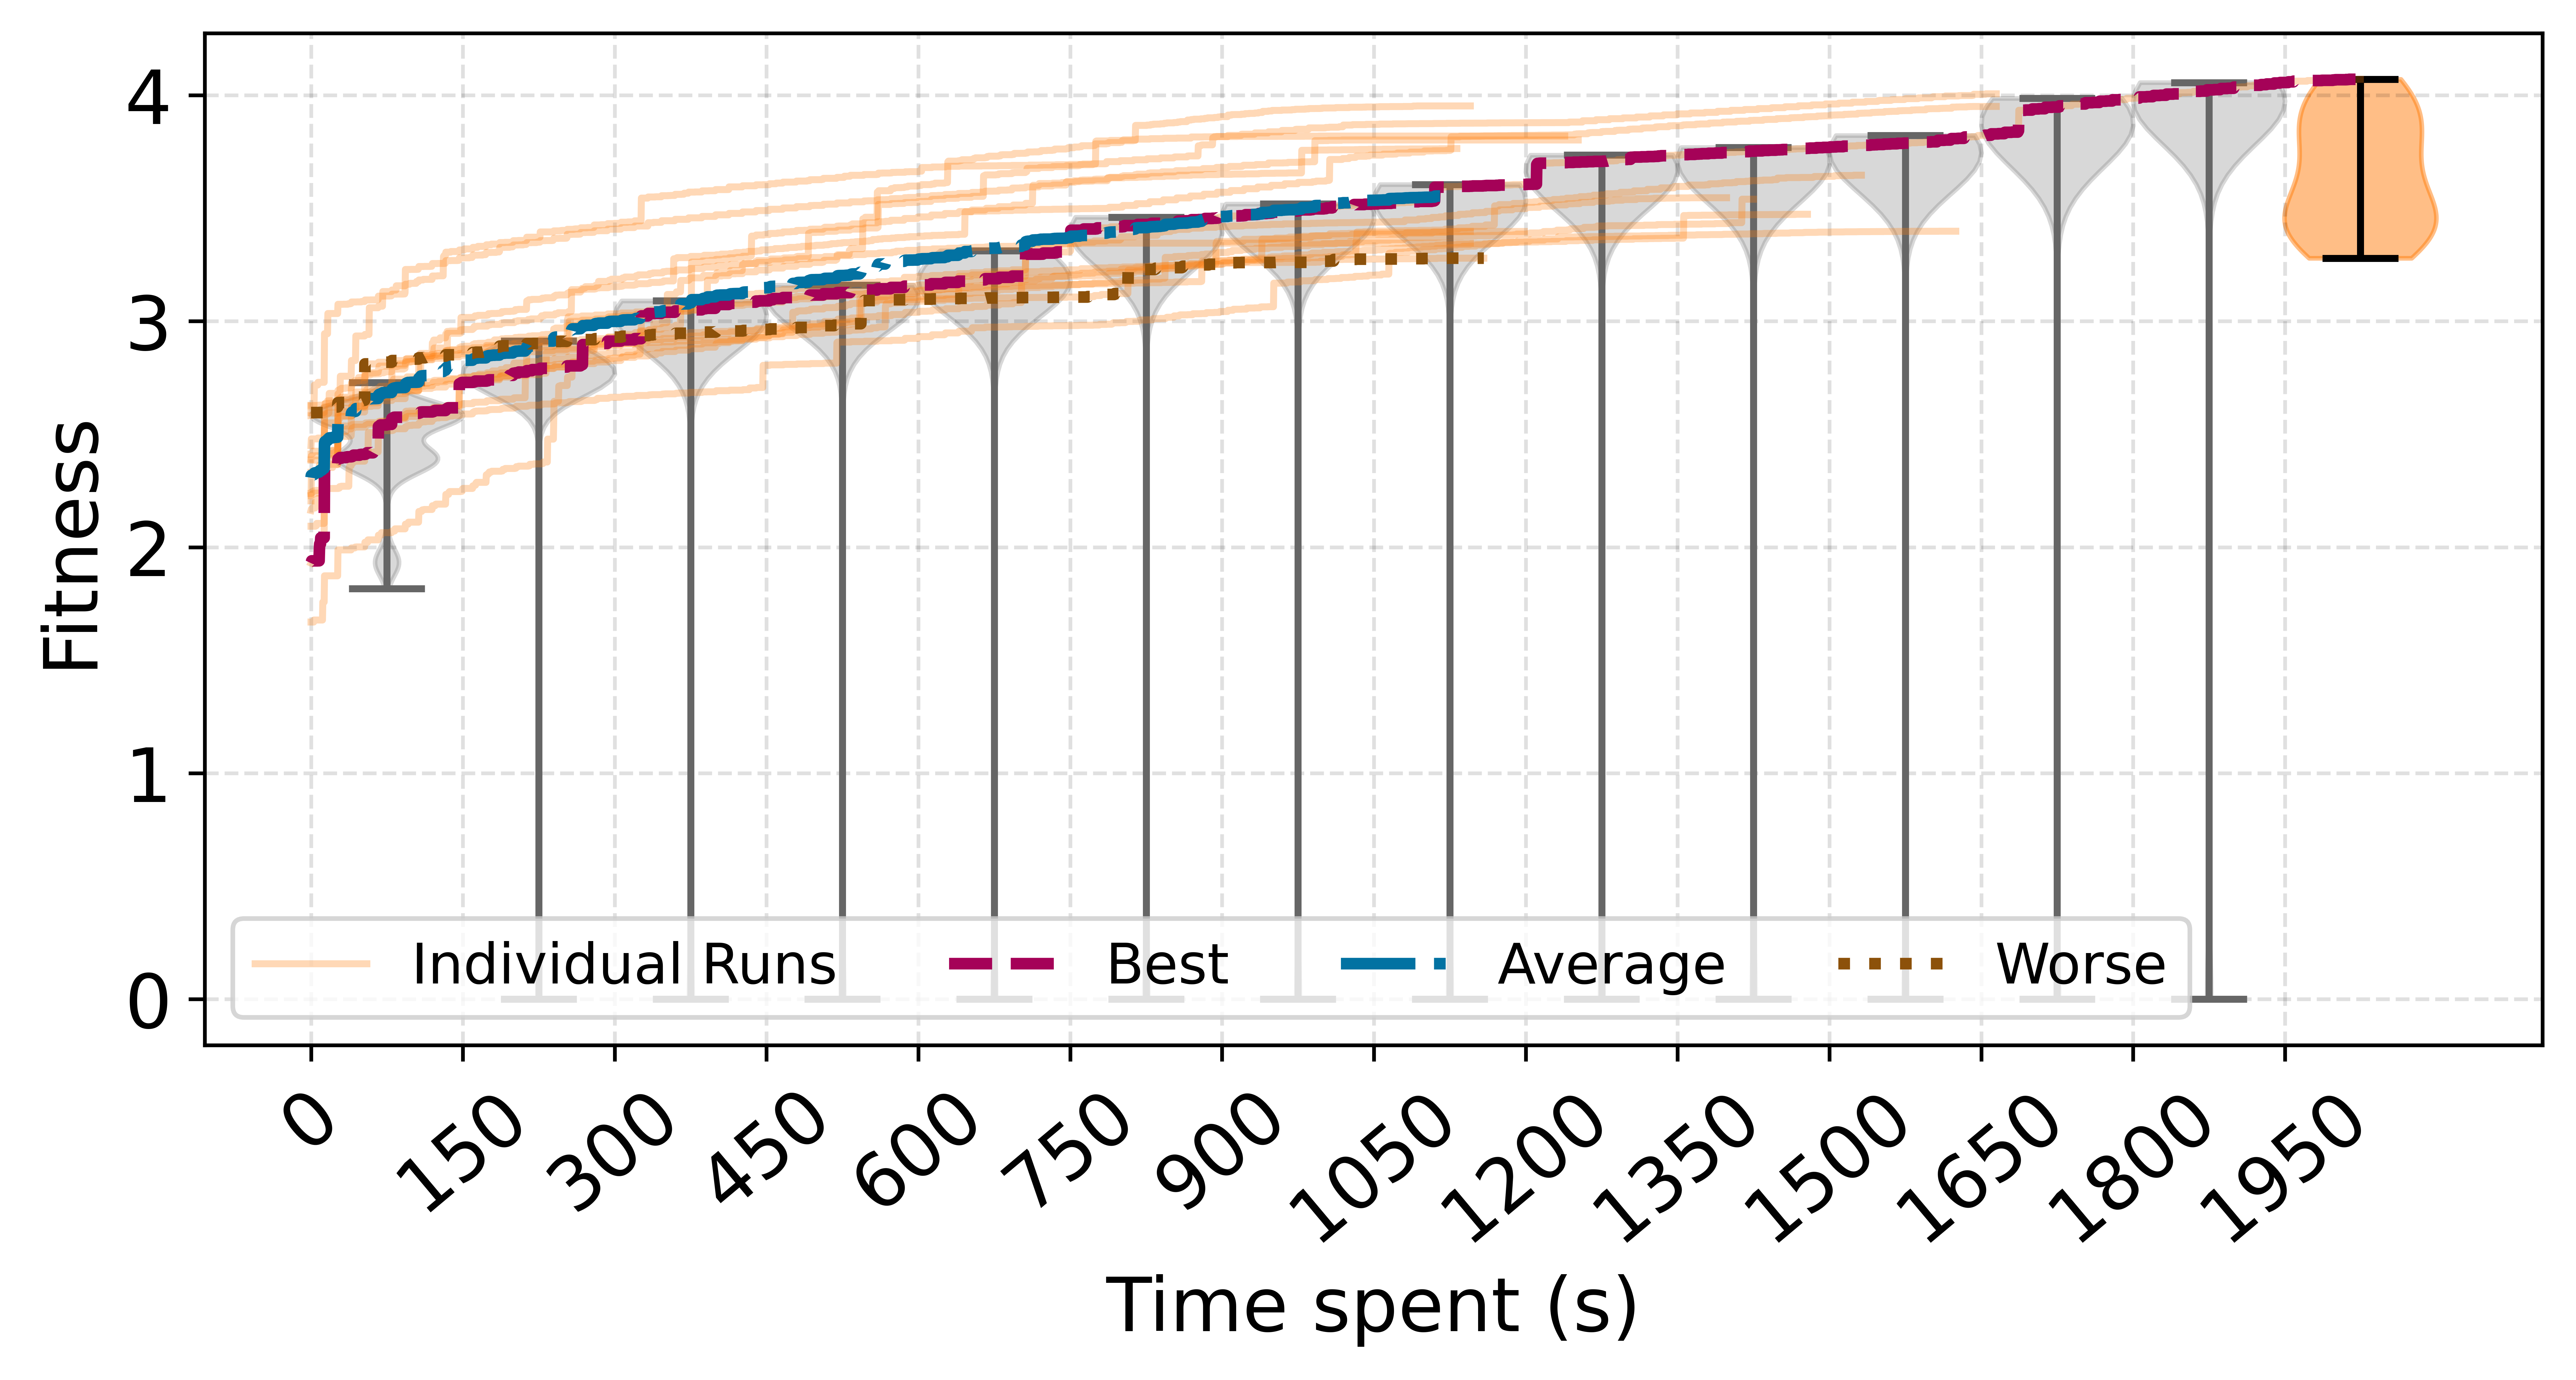

In [52]:
boxwidth = 150

longest_time = max([(run.index * simanneal_time_per_it)[-1] for run in simanneal])
tries_results = []
for run in simanneal:
    plt.plot(run.index * simanneal_time_per_it, run.fitness.rolling(60000, min_periods=1).max(), color='tab:orange', alpha=0.3, zorder=2, label='Individual Runs')
    tries_results.append(run.fitness.max())
vplot = plt.violinplot([tries_results], positions=[longest_time], widths=boxwidth)
for pc in vplot['bodies']:
    pc.set_linewidth(1)
    pc.set_facecolor('tab:orange')
    pc.set_edgecolor('tab:orange')
    pc.set_alpha(0.5)

plt.plot(best_simanneal.index * simanneal_time_per_it, best_simanneal.fitness.rolling(60000, min_periods=1).max(), color='#a50258', linewidth=2.5, linestyle='--', label='Best', zorder=3)
plt.plot(avg_simanneal.index * simanneal_time_per_it, avg_simanneal, color='#0272a2', linewidth=2.5, linestyle='-.', label='Average', zorder=3)
plt.plot(worse_simanneal.index * simanneal_time_per_it, worse_simanneal.fitness.rolling(60000, min_periods=1).max(), color='#8c510a', linewidth=2.5, linestyle=':', label='Worse', zorder=3)

boxes, positions = [], []
for i in range(100):
    boxes.append(best_simanneal[(best_simanneal.index * simanneal_time_per_it > i*boxwidth) & (best_simanneal.index * simanneal_time_per_it < (i+1)*boxwidth)].fitness)
    positions.append(boxwidth/2 + i*boxwidth)
    if (i + 2) * boxwidth > (best_simanneal.index * simanneal_time_per_it)[-1]:
        break
vplot = plt.violinplot(boxes, positions=positions, widths=boxwidth)
for pc in vplot['bodies']:
    pc.set_color('tab:grey')
    pc.set_facecolor('tab:grey')
    pc.set_edgecolor('tab:grey')

plt.xticks([i*boxwidth for i in range(int(longest_time / boxwidth)+1)], rotation=40)
plt.grid(alpha=0.12, linestyle='--')
plt.xlabel('Time spent (s)')
plt.ylabel('Fitness')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 12}, ncol=4)
plt.savefig('img/results/005_simulatedannealing.pdf', format='pdf', bbox_inches='tight');

### Genetic alg

In [ ]:
boxwidth = 300

longest_time = max([(run.index * genetic_time_per_it)[-1] for run in genetic])
tries_results = []
for run in genetic:
    plt.plot(run.index * genetic_time_per_it, run.fitness.rolling(60000, min_periods=1).max(), color='tab:orange', alpha=0.3, zorder=2, label='Individual Runs')
    tries_results.append(run.fitness.max())
vplot = plt.violinplot([tries_results], positions=[longest_time], widths=boxwidth)
for pc in vplot['bodies']:
    pc.set_linewidth(1)
    pc.set_facecolor('tab:orange')
    pc.set_edgecolor('tab:orange')
    pc.set_alpha(0.5)

plt.plot(best_genetic.index * genetic_time_per_it, best_genetic.fitness.rolling(60000, min_periods=1).max(), color='#a50258', linewidth=2.5, linestyle='--', label='Best', zorder=3)
plt.plot(avg_genetic.index * genetic_time_per_it, avg_genetic, color='#0272a2', linewidth=2.5, linestyle='-.', label='Average', zorder=3)
plt.plot(worse_genetic.index * genetic_time_per_it, worse_genetic.fitness.rolling(60000, min_periods=1).max(), color='#8c510a', linewidth=2.5, linestyle=':', label='Worse', zorder=3)

boxes, positions = [], []
for i in range(100):
    boxes.append(best_genetic[(best_genetic.index * genetic_time_per_it > i*boxwidth) & (best_genetic.index * genetic_time_per_it < (i+1)*boxwidth)].fitness)
    positions.append(boxwidth/2 + i*boxwidth)
    if (i + 2) * boxwidth > (best_genetic.index * genetic_time_per_it)[-1]:
        break
vplot = plt.violinplot(boxes, positions=positions, widths=boxwidth)
for pc in vplot['bodies']:
    pc.set_color('tab:grey')
    pc.set_facecolor('tab:grey')
    pc.set_edgecolor('tab:grey')

plt.xticks([i*boxwidth for i in range(int(longest_time / boxwidth)+1)], rotation=40)
plt.grid(alpha=0.12, linestyle='--')
plt.xlabel('Time spent (s)')
plt.ylabel('Fitness')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 12}, ncol=4)
plt.savefig('img/results/006_genetic.pdf', format='pdf', bbox_inches='tight');

### General figs

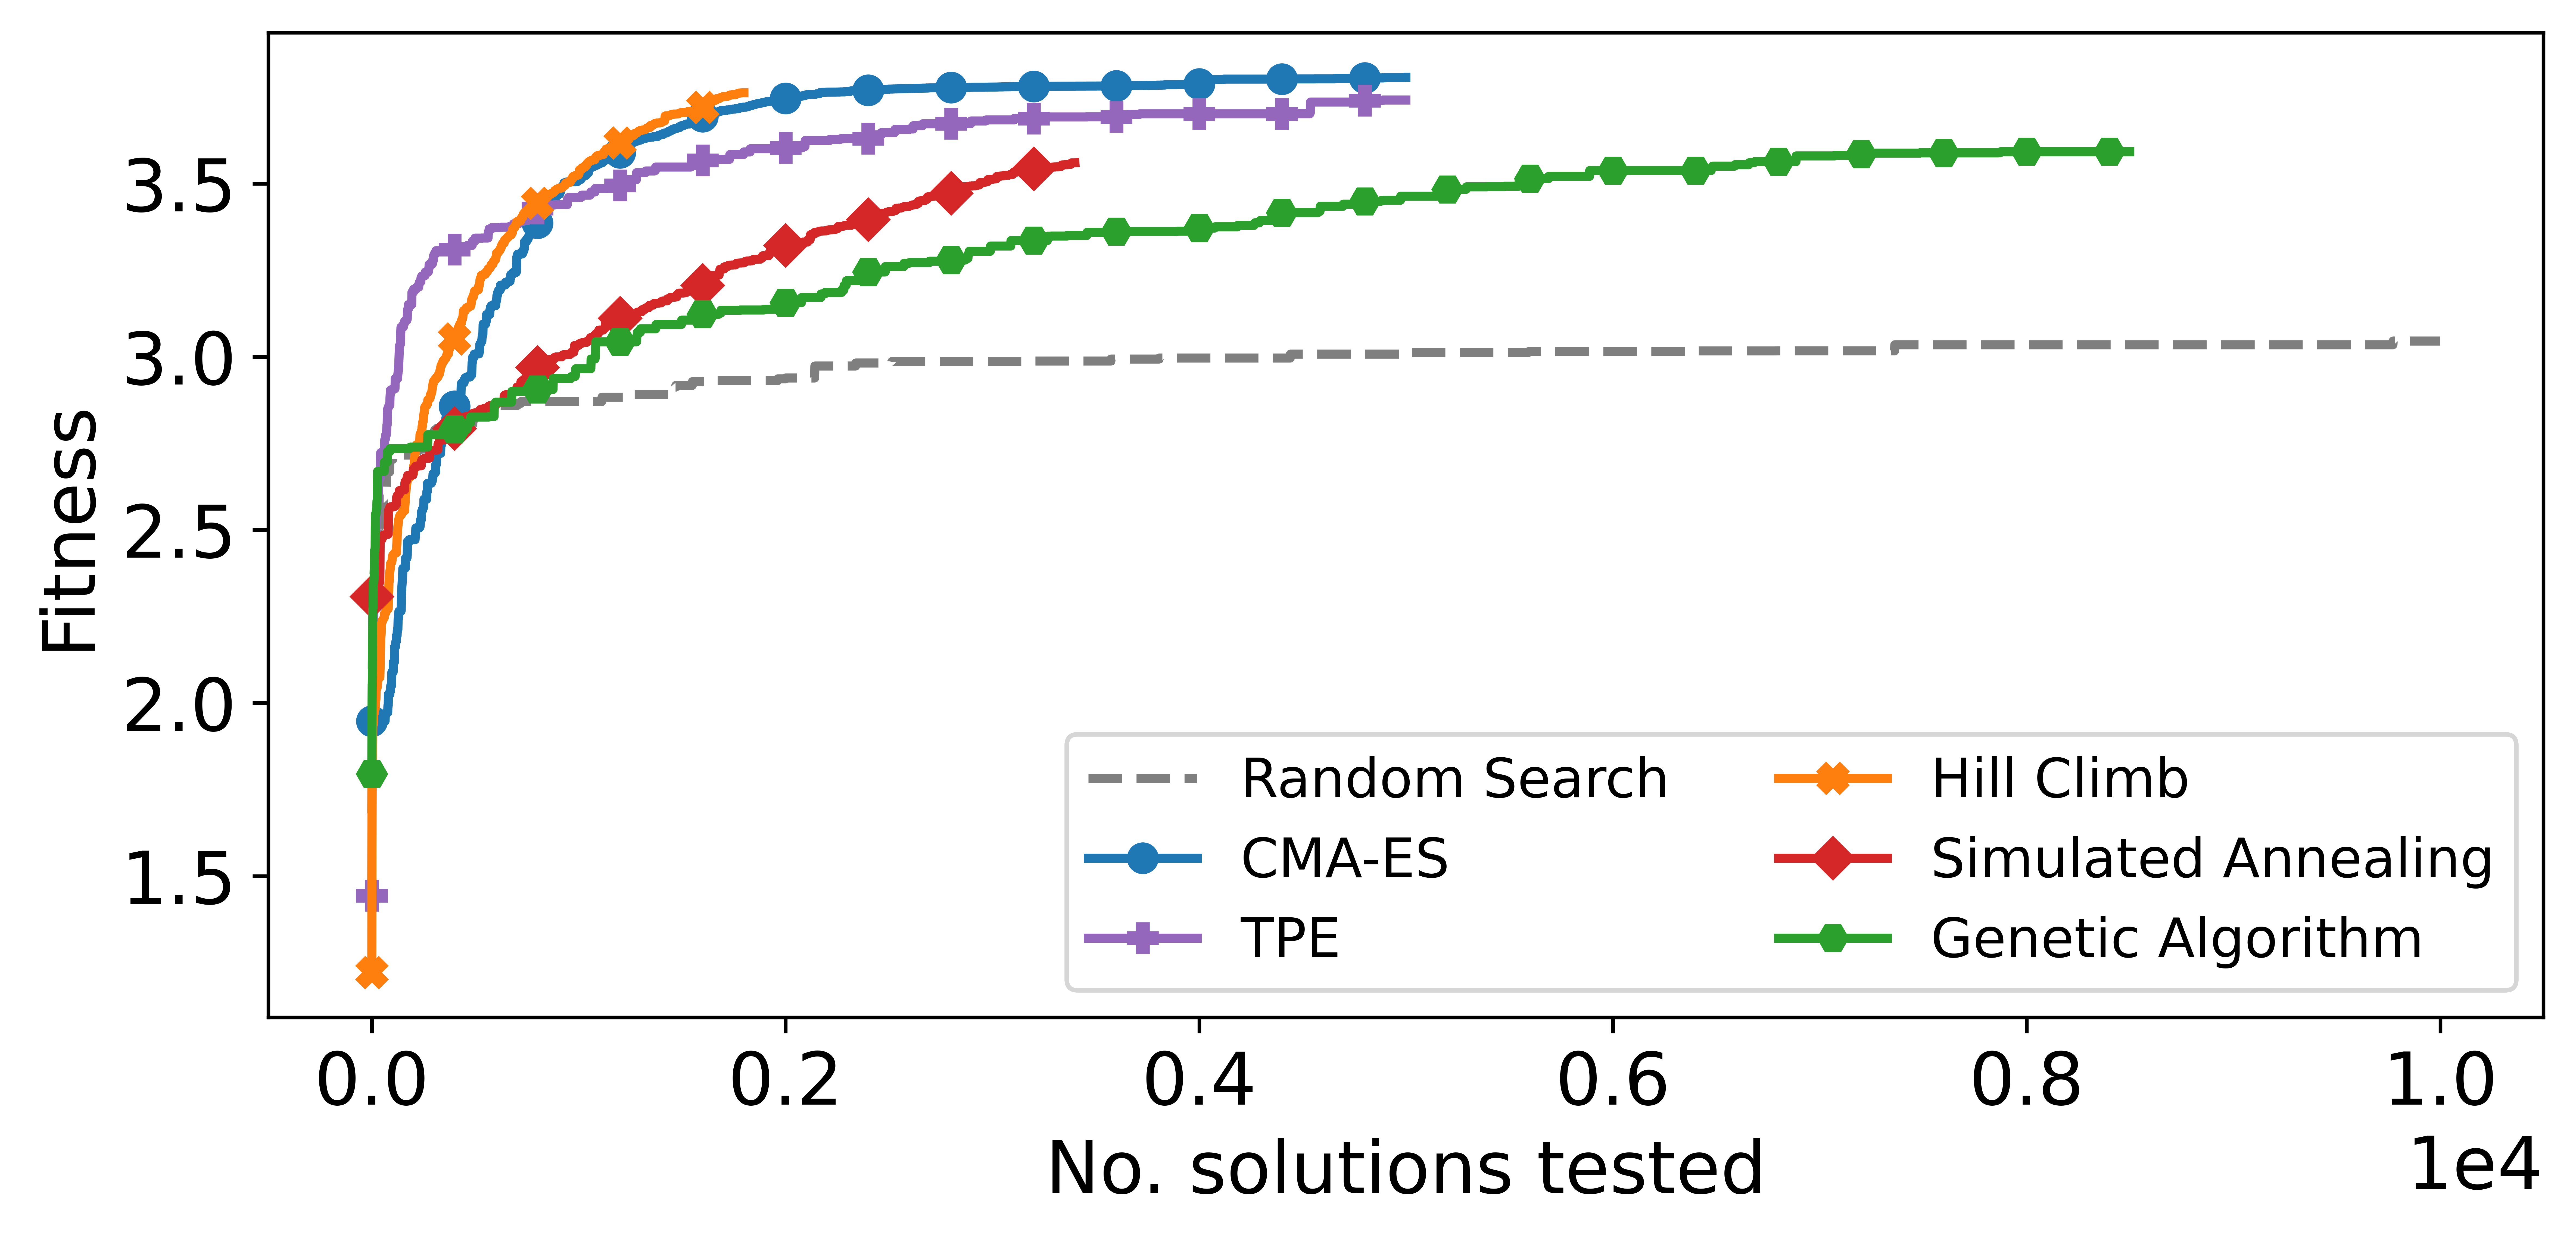

In [51]:
plt.plot(avg_randsearch.index[:10000], avg_randsearch.iloc[:10000], color='tab:grey', linewidth=2, linestyle='--', label='Random Search', zorder=3)
plt.plot(avg_cmaes.index, avg_cmaes, color='tab:blue', linewidth=2, marker='o', markevery=400, label='CMA-ES', zorder=3)
plt.plot(avg_tpe.index, avg_tpe, color='tab:purple', linewidth=2, marker='P', markevery=400, label='TPE', zorder=3)
plt.plot(avg_hillclimb.index, avg_hillclimb, color='tab:orange', linewidth=2, marker='X', markevery=400, label='Hill Climb', zorder=3)
plt.plot(avg_simanneal.index, avg_simanneal, color='tab:red', linewidth=2, marker='D', markevery=400, label='Simulated Annealing', zorder=3)
plt.plot(avg_genetic.index, avg_genetic, color='tab:green', linewidth=2, marker='H', markevery=400, label='Genetic Algorithm', zorder=3)

plt.xlabel('No. solutions tested')
plt.ylabel('Fitness')
plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])

plt.legend(prop={'size': 12}, ncol=2)
plt.savefig('img/results/010_all_algo_iterations.pdf', format='pdf', bbox_inches='tight');

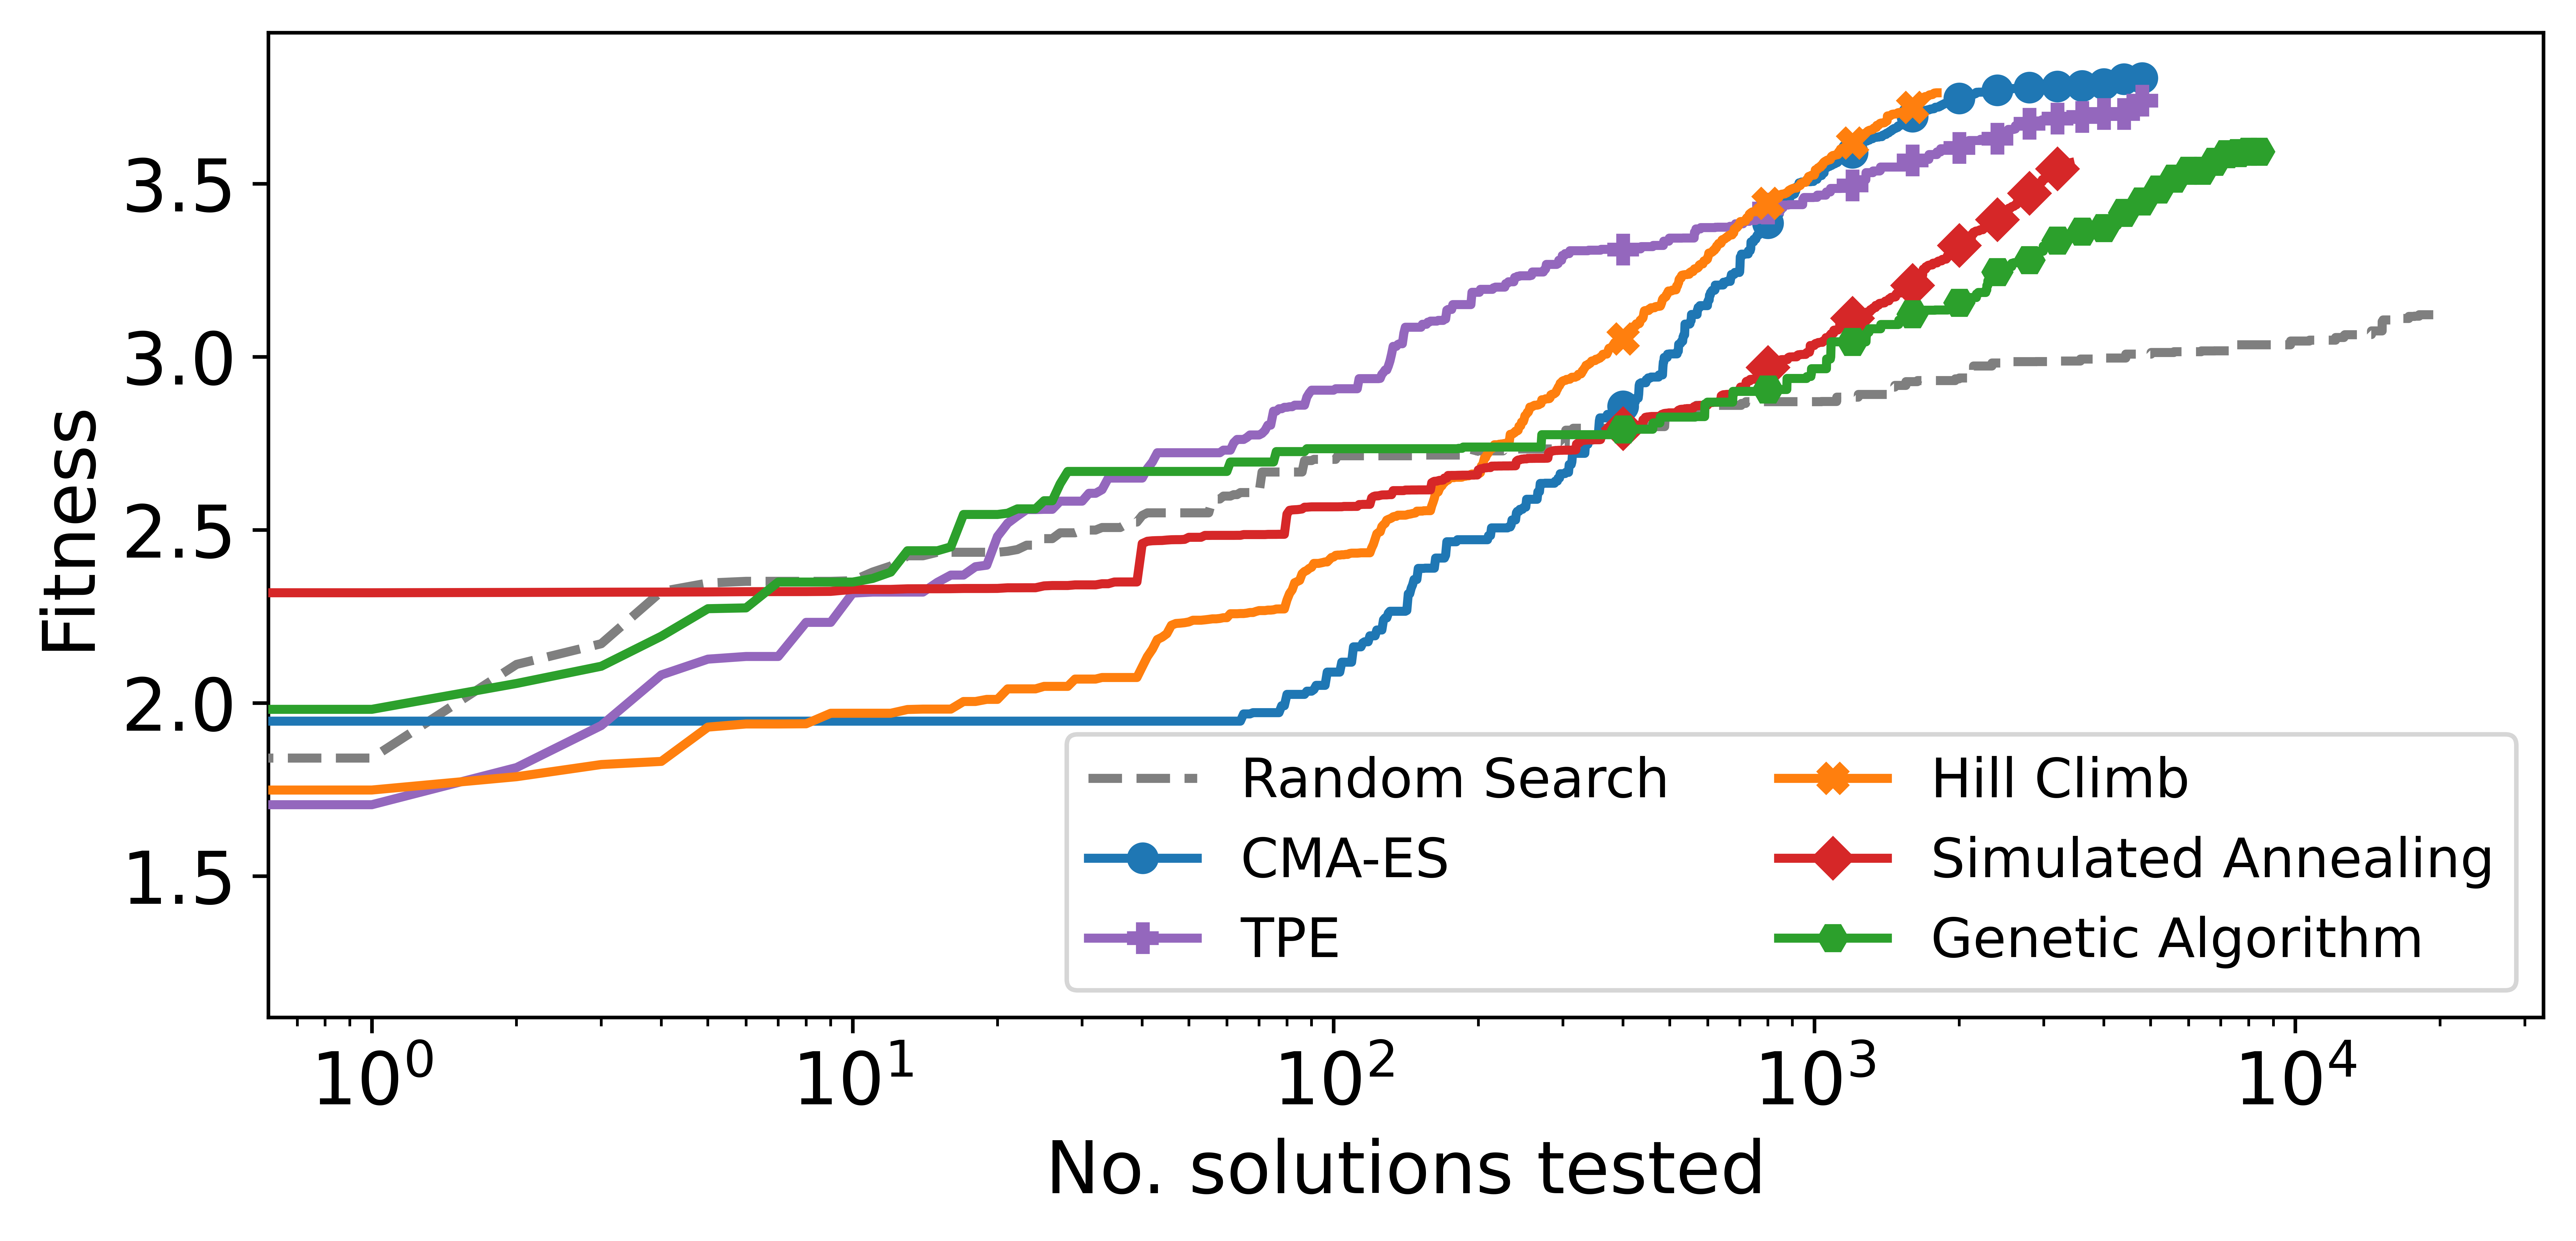

In [48]:
plt.plot(avg_randsearch.index, avg_randsearch, color='tab:grey', linewidth=2, linestyle='--', label='Random Search', zorder=3)
plt.plot(avg_cmaes.index, avg_cmaes, color='tab:blue', linewidth=2, marker='o', markevery=400, label='CMA-ES', zorder=3)
plt.plot(avg_tpe.index, avg_tpe, color='tab:purple', linewidth=2, marker='P', markevery=400, label='TPE', zorder=3)
plt.plot(avg_hillclimb.index, avg_hillclimb, color='tab:orange', linewidth=2, marker='X', markevery=400, label='Hill Climb', zorder=3)
plt.plot(avg_simanneal.index, avg_simanneal, color='tab:red', linewidth=2, marker='D', markevery=400, label='Simulated Annealing', zorder=3)
plt.plot(avg_genetic.index, avg_genetic, color='tab:green', linewidth=2, marker='H', markevery=400, label='Genetic Algorithm', zorder=3)

plt.xlabel('No. solutions tested')
plt.ylabel('Fitness')
plt.xscale('log')

plt.legend(prop={'size': 12}, ncol=2)
plt.savefig('img/results/011_all_algo_iterations_log.pdf', format='pdf', bbox_inches='tight');

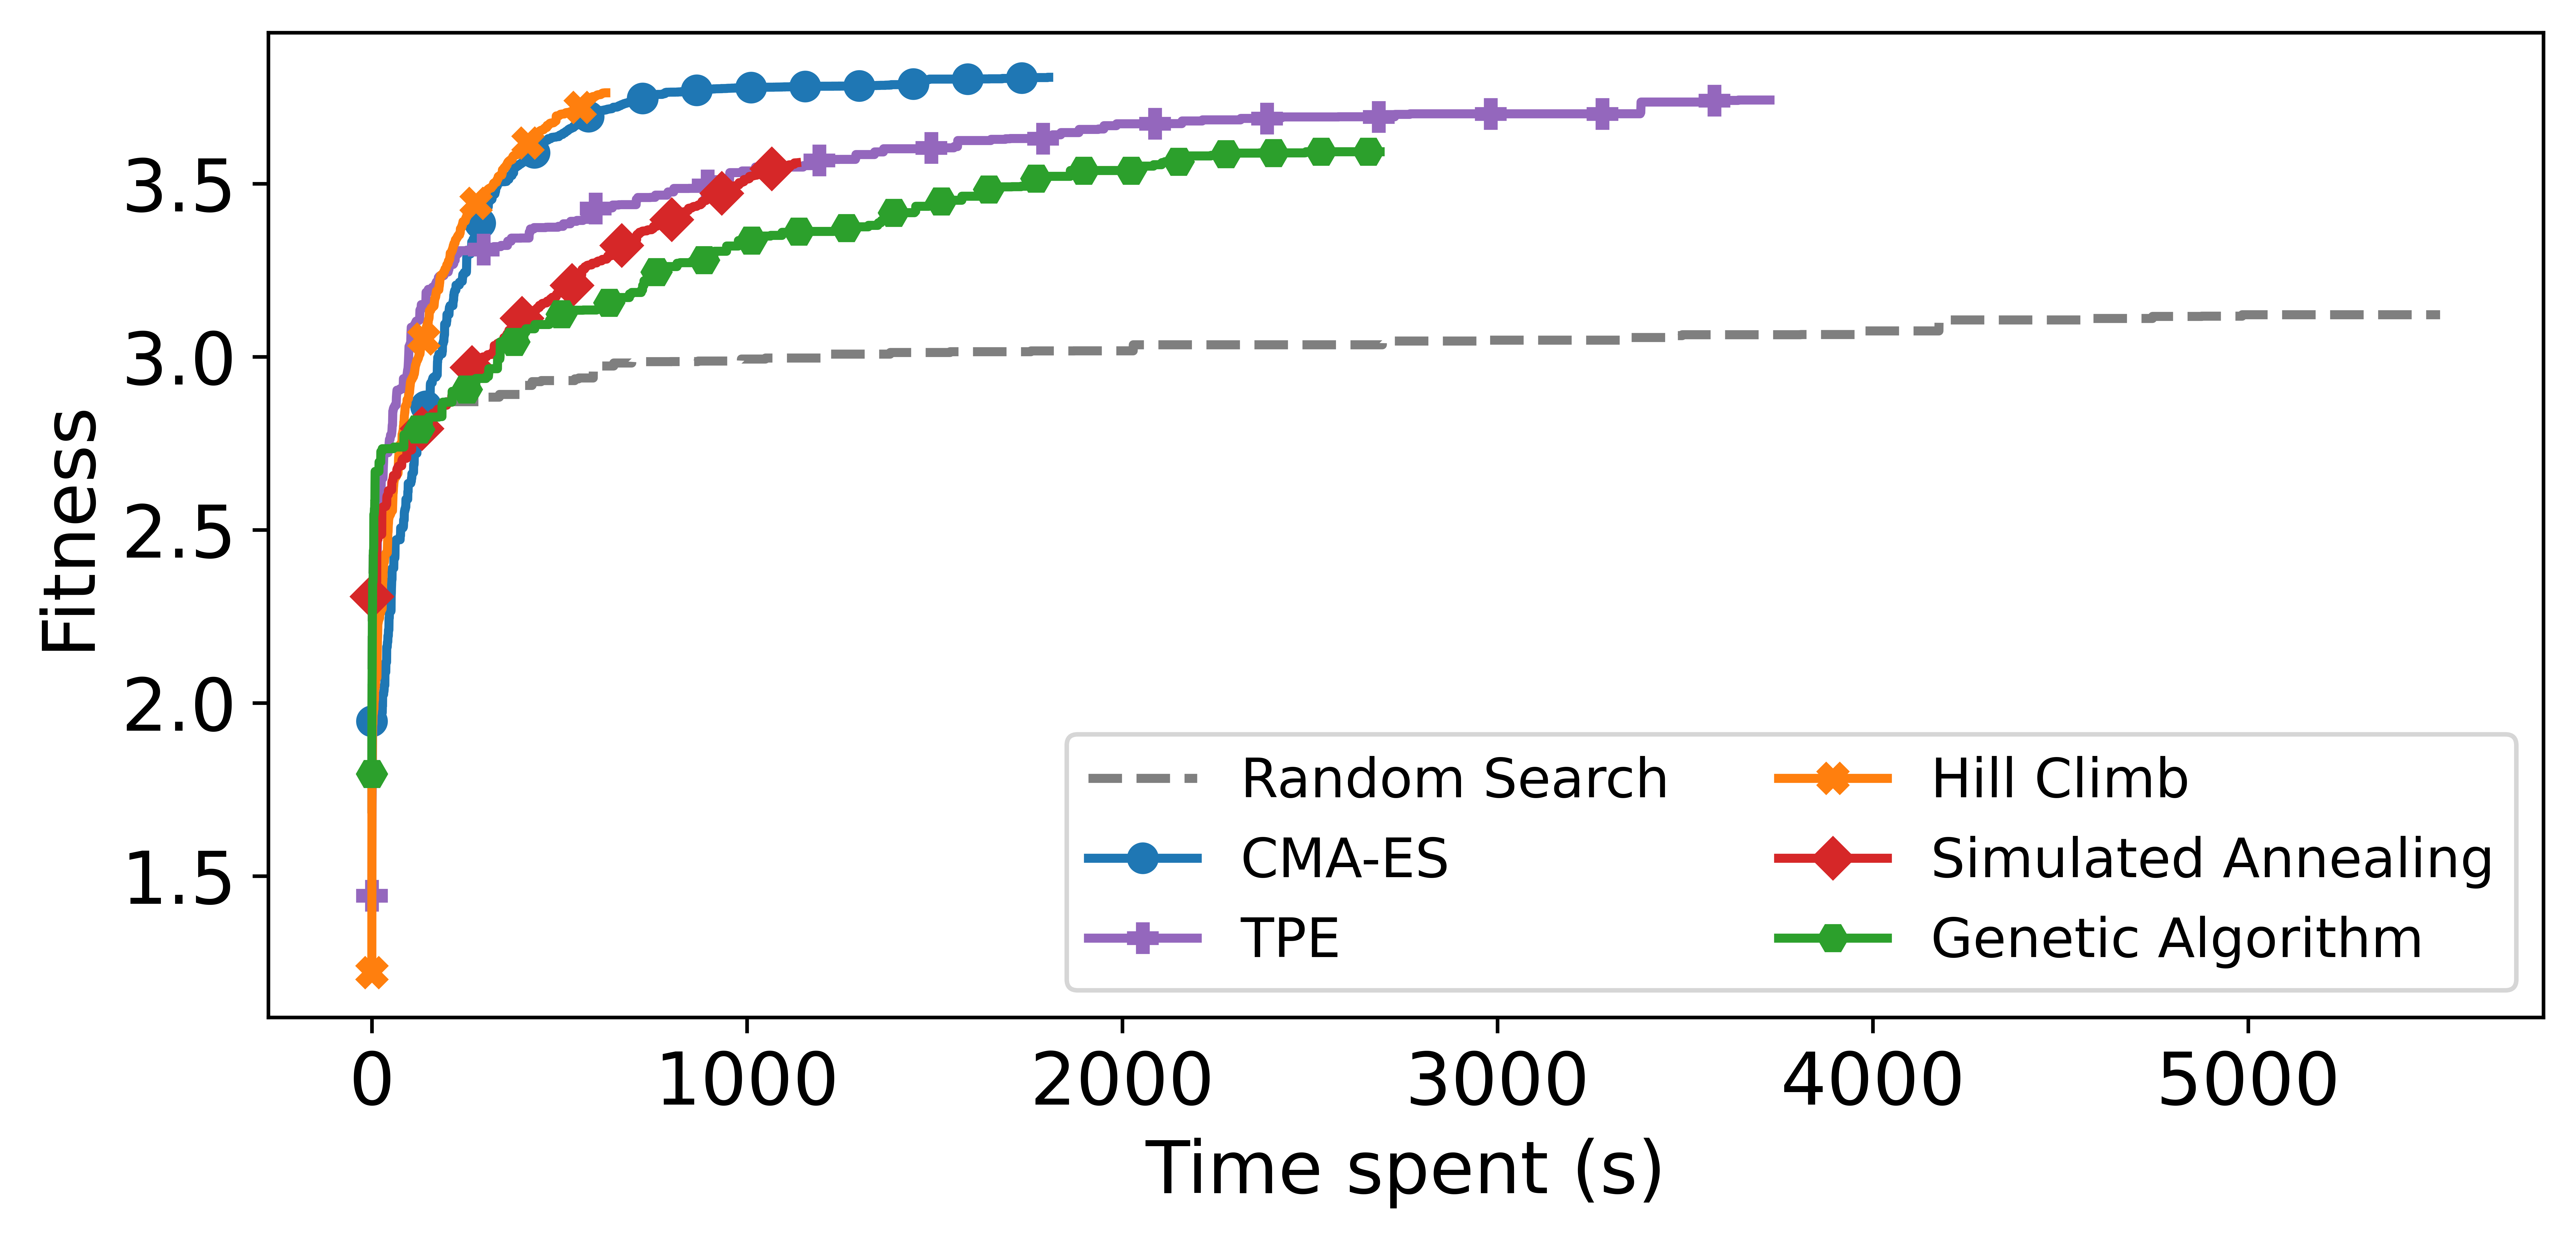

In [50]:
plt.plot(avg_randsearch.index * randsearch_time_per_it, avg_randsearch, color='tab:grey', linewidth=2, linestyle='--', label='Random Search', zorder=3)
plt.plot(avg_cmaes.index * cmaes_time_per_it, avg_cmaes, color='tab:blue', linewidth=2, marker='o', markevery=400, label='CMA-ES', zorder=3)
plt.plot(avg_tpe.index * tpe_time_per_it, avg_tpe, color='tab:purple', linewidth=2, marker='P', markevery=400, label='TPE', zorder=3)
plt.plot(avg_hillclimb.index * hillclimb_time_per_it, avg_hillclimb, color='tab:orange', linewidth=2, marker='X', markevery=400, label='Hill Climb', zorder=3)
plt.plot(avg_simanneal.index * simanneal_time_per_it, avg_simanneal, color='tab:red', linewidth=2, marker='D', markevery=400, label='Simulated Annealing', zorder=3)
plt.plot(avg_genetic.index * genetic_time_per_it, avg_genetic, color='tab:green', linewidth=2, marker='H', markevery=400, label='Genetic Algorithm', zorder=3)

plt.xlabel('Time spent (s)')
plt.ylabel('Fitness')

plt.legend(prop={'size': 12}, ncol=2)
plt.savefig('img/results/012_all_algo_time.pdf', format='pdf', bbox_inches='tight');

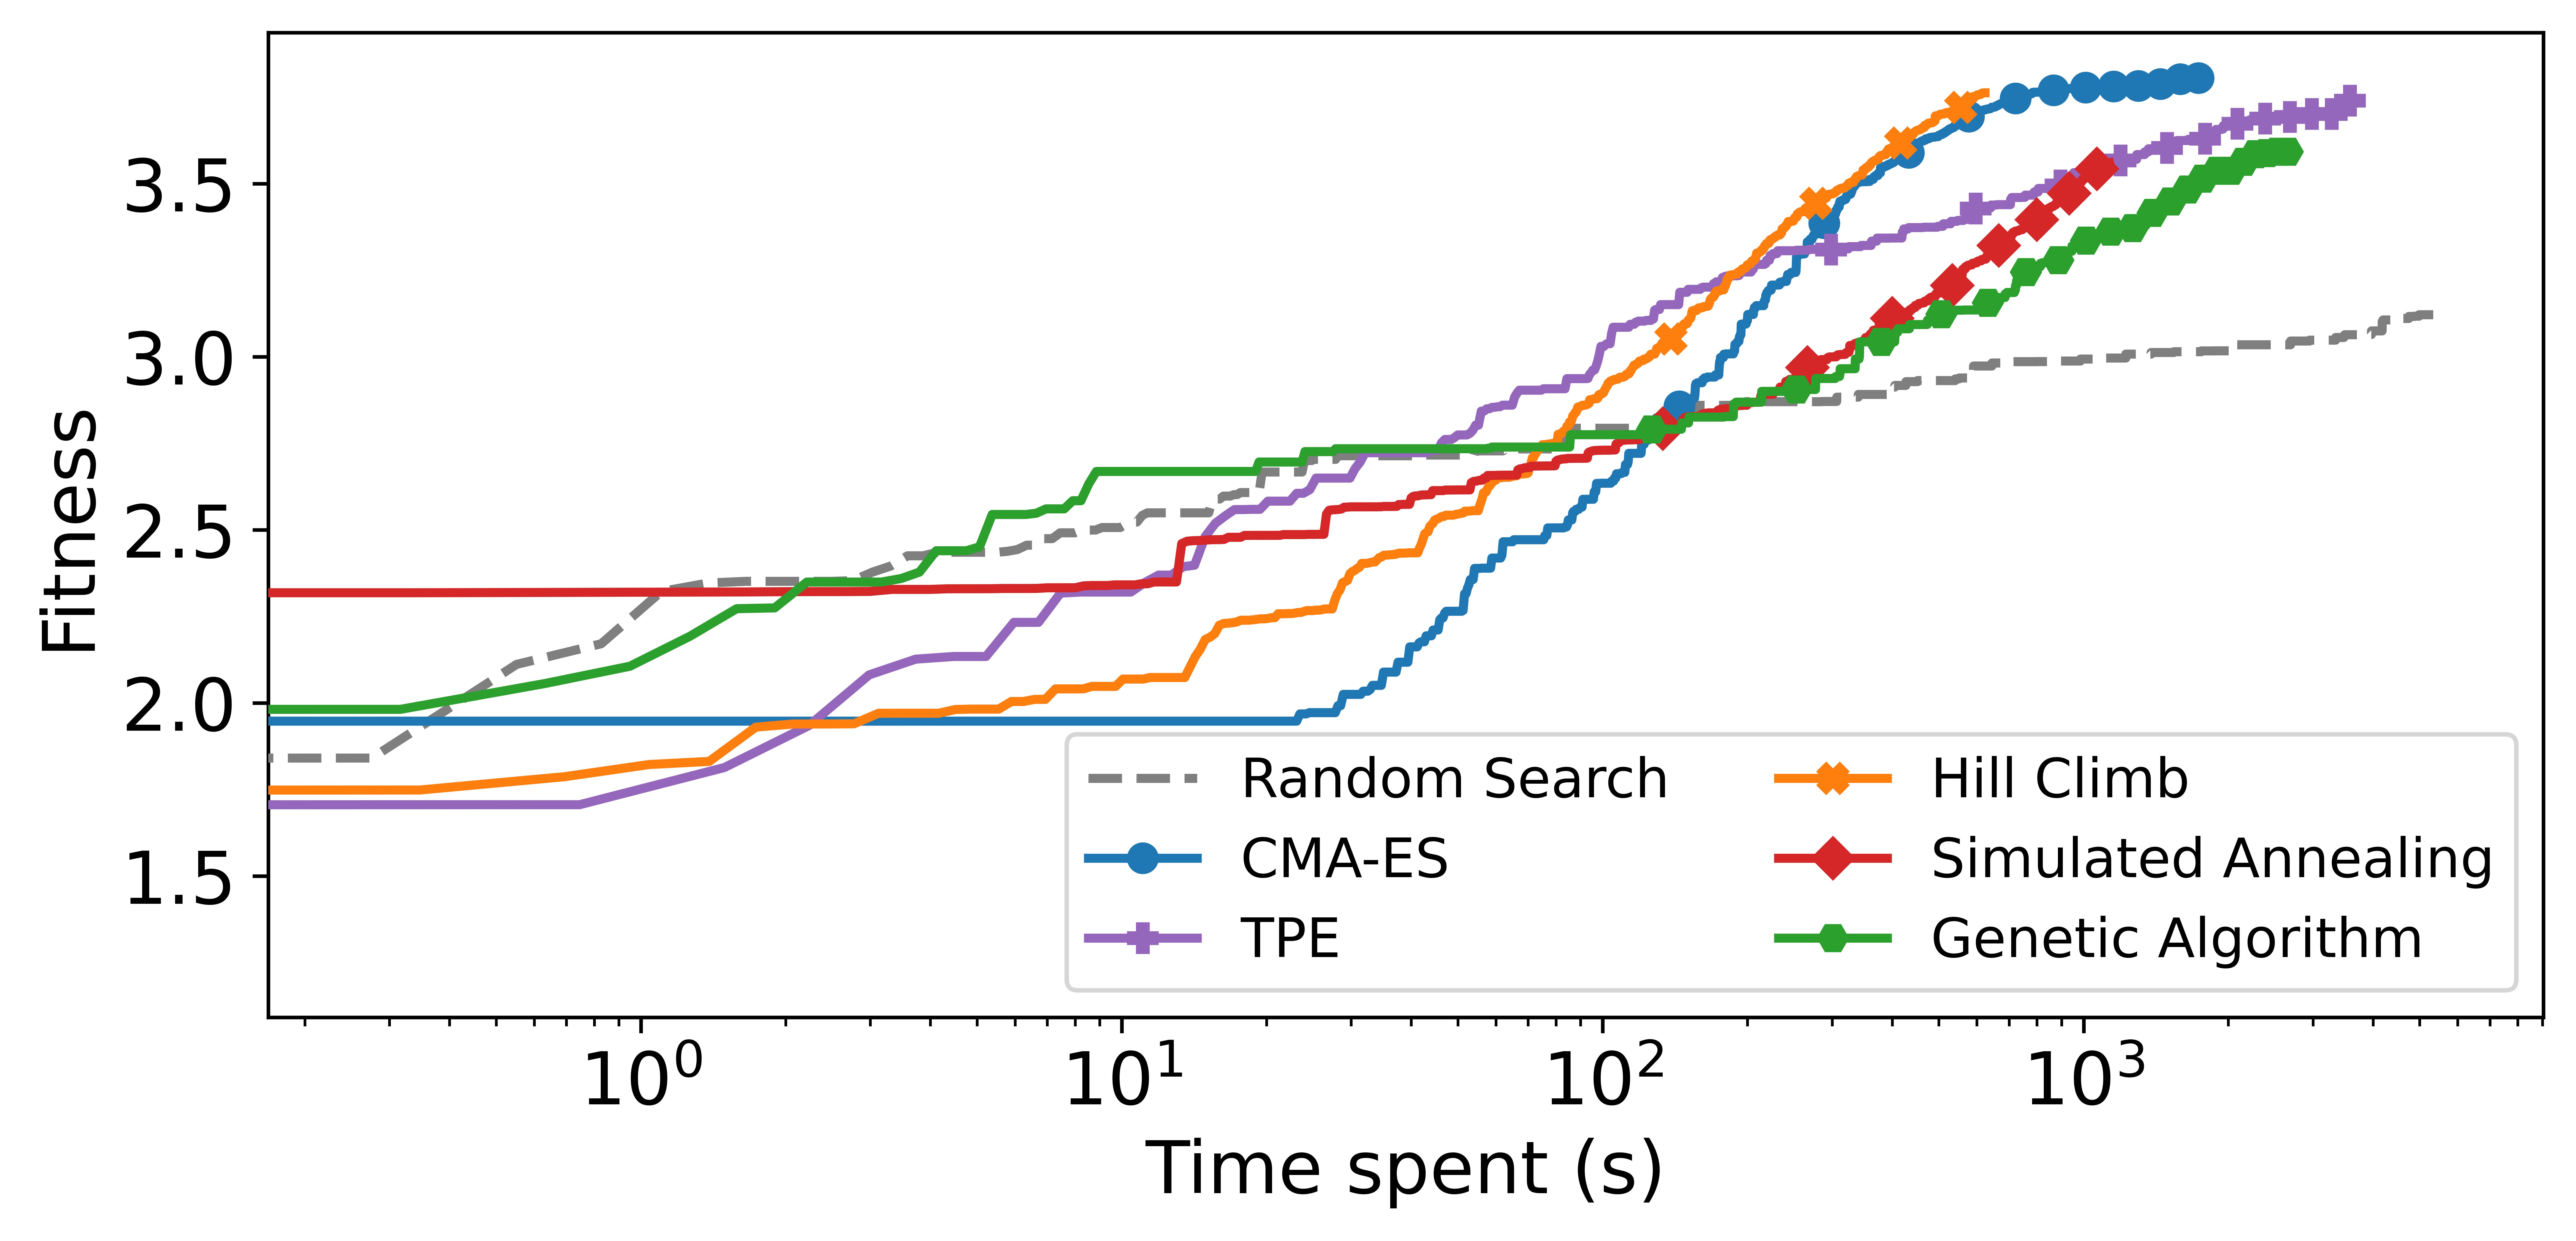

In [49]:
plt.plot(avg_randsearch.index * randsearch_time_per_it, avg_randsearch, color='tab:grey', linewidth=2, linestyle='--', label='Random Search', zorder=3)
plt.plot(avg_cmaes.index * cmaes_time_per_it, avg_cmaes, color='tab:blue', linewidth=2, marker='o', markevery=400, label='CMA-ES', zorder=3)
plt.plot(avg_tpe.index * tpe_time_per_it, avg_tpe, color='tab:purple', linewidth=2, marker='P', markevery=400, label='TPE', zorder=3)
plt.plot(avg_hillclimb.index * hillclimb_time_per_it, avg_hillclimb, color='tab:orange', linewidth=2, marker='X', markevery=400, label='Hill Climb', zorder=3)
plt.plot(avg_simanneal.index * simanneal_time_per_it, avg_simanneal, color='tab:red', linewidth=2, marker='D', markevery=400, label='Simulated Annealing', zorder=3)
plt.plot(avg_genetic.index * genetic_time_per_it, avg_genetic, color='tab:green', linewidth=2, marker='H', markevery=400, label='Genetic Algorithm', zorder=3)

plt.xlabel('Time spent (s)')
plt.ylabel('Fitness')
plt.xscale('log')

plt.legend(prop={'size': 12}, ncol=2)
plt.savefig('img/results/013_all_algo_time_log.pdf', format='pdf', bbox_inches='tight');

In [63]:
tries_results = []

tries_results.append([])
for run in randsearch:
    tries_results[-1].append(run.fitness.max())
tries_results.append([])
for run in cmaes:
    tries_results[-1].append(run.fitness.max())
tries_results.append([])
for run in tpe:
    tries_results[-1].append(run.fitness.max())
tries_results.append([])
for run in hillclimb:
    tries_results[-1].append(run.fitness.max())
tries_results.append([])
for run in simanneal:
    tries_results[-1].append(run.fitness.max())
tries_results.append([])
for run in genetic:
    tries_results[-1].append(run.fitness.max())

positions = [1, 2, 3, 4, 5, 6]
plt.xticks(positions, ['Random Search', 'CMA-ES', 'TPE', 'Hill Climb', 'Simulated Annealing', 'Genetic Algorithm'], rotation=45)
colors_order = ['tab:grey', 'tab:blue', 'tab:purple', 'tab:orange', 'tab:red', 'tab:green']
vplot = plt.violinplot(tries_results, positions=positions, widths=1)
for i, pc in zip(colors_order, vplot['bodies']):
    pc.set_facecolor(i)
    pc.set_edgecolor(i)

plt.savefig('img/results/014_all_algos_result_only.pdf', format='pdf', bbox_inches='tight');